<a href="https://colab.research.google.com/github/SaiArjunSairamje/Python_Libraries/blob/main/04.%20Numpy_4%20(Misc_Topics)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Short revision of previous class**
***

In [1]:
import numpy as np

In [2]:
a = np.arange(4)

In [3]:
print(a)

[0 1 2 3]


In [4]:
b = a.reshape(2,2)

In [5]:
np.shares_memory(a,b)

True

In [6]:
a[0] = 100

In [7]:
print(b)    #shallow copy

[[100   1]
 [  2   3]]


In [8]:
c = a.copy()    #deep copy

In [9]:
print(a)

[100   1   2   3]


In [10]:
print(c)

[100   1   2   3]


In [11]:
a[1] = 101

In [12]:
print(a)

[100 101   2   3]


In [13]:
print(c)

[100   1   2   3]


In [14]:
np.shares_memory(a,c)

False

In [15]:
a = np.arange(5)

In [16]:
print(a)

[0 1 2 3 4]


In [17]:
b = a + 2   #deep copy automatically

In [18]:
print(b)

[2 3 4 5 6]


In [19]:
np.shares_memory(a,b)

False

In [20]:
a[0] = 10

In [21]:
print(a)

[10  1  2  3  4]


In [22]:
print(b)

[2 3 4 5 6]


In [23]:
#shallow copy - same address
#deep copy - different address

In [24]:
a = np.arange(10)

In [25]:
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [26]:
b = a[::2]    #stride

In [27]:
print(b)

[0 2 4 6 8]


In [28]:
np.shares_memory(a,b)

True

In [29]:
a[0] = 20

In [30]:
print(b)

[20  2  4  6  8]


In [31]:
a[1] = 30

In [32]:
print(a)

[20 30  2  3  4  5  6  7  8  9]


In [33]:
print(b)    #stride

[20  2  4  6  8]


In [34]:
a = np.arange(5)

In [35]:
b = a.view()    #shallow copy

In [36]:
np.shares_memory(a,b)

True

# **Special Cases**
***
**NumPy** arrays are **homogeneous**, meaning they store elements of the same data type. This allows for **efficient memory usage** and **faster numerical operations**.

On the other hand, **Python lists** can hold elements of different data types, making them **slower for numerical computations** due to their **heterogeneous** nature.

**NumPy's homogeneous** and **contiguous memory layout** enable vectorized operations, improving performance for scientific computing and large datasets.






In [37]:
a = np.array([1,4,2.5,7])

In [38]:
a

array([1. , 4. , 2.5, 7. ])

In [39]:
print(a)

[1.  4.  2.5 7. ]


In [40]:
a = np.array([1, 'a'])

In [41]:
a

array(['1', 'a'], dtype='<U21')

In [42]:
#Everything is Object in Python
#When each element has diffierent datatypes, Numpy will not throw error message but will send warning message.This wil make every elements as "Object" datatype.
a = np.array([1, 'm' , [1,2,3]])

<ipython-input-42-0864525b392d>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array([1, 'm' , [1,2,3]])


In [43]:
a

array([1, 'm', list([1, 2, 3])], dtype=object)

 **`NOTE:`**      
 When the variable is stored as an **"Object"** as shown above, it will be a **"Python List"** and **not** as a **"NumPy Array"**. In such cases the "NumPy" facilities will not work since it only supports **homogeneous** data.

In [44]:
a = np.array([1, 'm', [1,2,3]], dtype = 'object')

In [45]:
b = a.copy()    #due to the above mentoned reason, this will not work and will still be a "Shallow copy" only...

In [46]:
np.shares_memory(a,b) #hw #this should be True...need to check why it's show's as False...

False

In [47]:
a[2][0] = 5

In [48]:
print(b)    #shallow copy

[1 'm' list([5, 2, 3])]


In [49]:
a[2][1] = 100

In [50]:
print(b)    #shallow copy --> these are special cases wherein even with .copy() being applied, we are still getting the changes of the original data...

[1 'm' list([5, 100, 3])]


### **Deep copy for "Object" datatype**

**If we still want to make sure that the changes made in original data/variable does `not` affect the new data/variable, there is a special case wherein we need to `import the module copy`.**

In [51]:
import copy

In [52]:
a = np.array([1, 'm' , [1,2,3]], dtype = 'object')

In [53]:
b = copy.deepcopy(a)    #special case for object datatype to have deep copy

In [54]:
a[2][0] = 10

In [55]:
print(a)

[1 'm' list([10, 2, 3])]


In [56]:
print(b)

[1 'm' list([1, 2, 3])]


# **Misc Topics**
***
Here are some **miscellaneous topics** related to **NumPy**

### **Splitting**

In [57]:
x = np.arange(9)

In [58]:
print(x)

[0 1 2 3 4 5 6 7 8]


In [59]:
b = np.split(x , 3)   #Histogram Bins in Tableau

In [60]:
print(b)

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]


In [61]:
b.ndim    #this will throw error message as the outer part is not a numpy array

AttributeError: ignored

In [62]:
type(b)

list

In [63]:
b = np.array(np.split(x , 3))   #Outer List to Numpy

In [64]:
type(b)

numpy.ndarray

In [65]:
b.ndim

2

In [66]:
np.split(x, 2)    #this will throw error message

ValueError: ignored

In [68]:
print(x)

[0 1 2 3 4 5 6 7 8]


In [69]:
np.split(x, [3,5,6])    #split value based on index

[array([0, 1, 2]), array([3, 4]), array([5]), array([6, 7, 8])]

In [70]:
x = np.arange(5,15)

In [71]:
print(x)

[ 5  6  7  8  9 10 11 12 13 14]


In [72]:
np.split(x , [2,4,7])

[array([5, 6]), array([7, 8]), array([ 9, 10, 11]), array([12, 13, 14])]

#### **Horizontal Split & Vertical Split**

**Expected o/p**

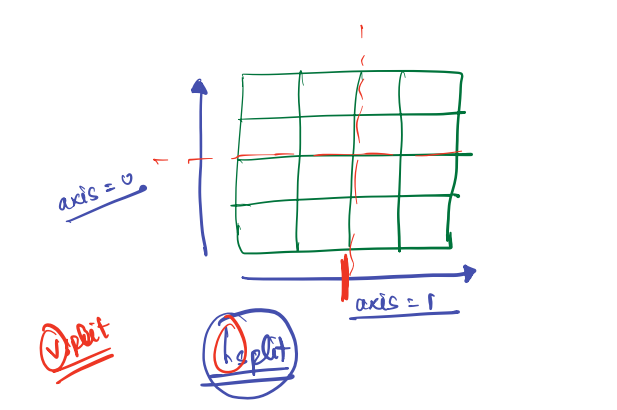

In [73]:
x = np.arange(16).reshape(4,4)

In [74]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [75]:
np.hsplit(x,2)  #split across horizontal axis

[array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]])]

In [76]:
np.hsplit(x, [1,2])

[array([[ 0],
        [ 4],
        [ 8],
        [12]]),
 array([[ 1],
        [ 5],
        [ 9],
        [13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]])]

In [77]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [78]:
np.vsplit(x, 2)   #split across vertical axis

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])]

In [79]:
np.vsplit(x, [3])

[array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15]])]

#### **Horizontal Stack & Vertical Stack**

**Expected o/p**

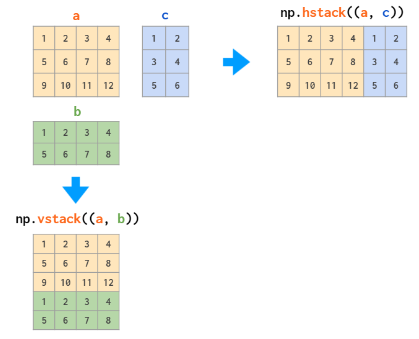

In [80]:
data = np.arange(5)

In [81]:
print(data)

[0 1 2 3 4]


In [82]:
np.vstack((data, data, data))   #Vertical stack

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [83]:
d1 = np.arange(5)

d2 = np.arange(6,11)

In [84]:
np.vstack((d1, d2))

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [85]:
d1 = np.arange(5).reshape(5,1)

In [86]:
print(d1)

[[0]
 [1]
 [2]
 [3]
 [4]]


In [87]:
d2 = np.arange(6,11).reshape(5,1)

In [88]:
print(d2)

[[ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [89]:
np.hstack((d1, d2))   #Horizontal stack

array([[ 0,  6],
       [ 1,  7],
       [ 2,  8],
       [ 3,  9],
       [ 4, 10]])

In [90]:
np.hstack((d1, d2, d1, d2))

array([[ 0,  6,  0,  6],
       [ 1,  7,  1,  7],
       [ 2,  8,  2,  8],
       [ 3,  9,  3,  9],
       [ 4, 10,  4, 10]])

#### **Concatenate with axis (i.e. alternative to vstack & hstack)**

In [91]:
z = np.array([[2,4]])

In [92]:
z.ndim

2

In [93]:
z.shape

(1, 2)

In [94]:
z1 = np.concatenate([z,z] , axis = 0)   #Vertical concatenate
print(z1)

[[2 4]
 [2 4]]


In [95]:
z1.shape

(2, 2)

In [96]:
z1 = np.concatenate([z,z] , axis = 1)   #Horizontal concatenate
print(z1)

[[2 4 2 4]]


In [97]:
z1.shape

(1, 4)

**Concept revision**

In [98]:
a = np.arange(6)    #1D Numpy array
print(a)

[0 1 2 3 4 5]


In [99]:
a.shape

(6,)

In [100]:
arr = a.reshape(1,-1)     #2D Numpy array  #reshape() - used often
print(arr)

[[0 1 2 3 4 5]]


In [101]:
arr.shape

(1, 6)

#### **Expand Dim (i.e. alternative to reshape)**

**Expand Dimension** is an alternative to **reshape()**

**Expected o/p**

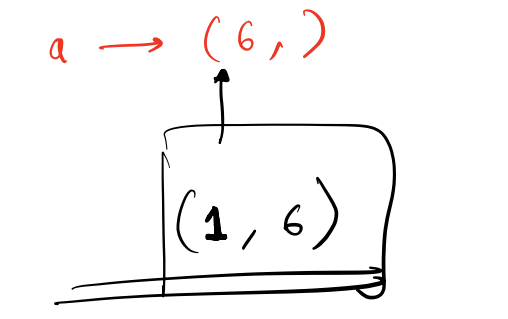

In [102]:
a = np.arange(6)

In [103]:
print(a)

[0 1 2 3 4 5]


In [104]:
a.shape

(6,)

In [105]:
a1 = np.expand_dims(a, axis = 0)    #Vertical Expand dimenson - used less     #this is adding one more dimension
print(a1)

[[0 1 2 3 4 5]]


In [106]:
a1.shape

(1, 6)

In [107]:
a = np.arange(5)

In [108]:
print(a)

[0 1 2 3 4]


In [109]:
a.shape

(5,)

In [110]:
a2 = np.expand_dims(a, axis = 1)    #Horizontal Expand dimenson    #this is adding one more dimension

In [111]:
a2.shape

(5, 1)

In [112]:
print(a2)

[[0]
 [1]
 [2]
 [3]
 [4]]


In [113]:
a3 = a.reshape(-1, 1)   #same as Horizontal Expand dimenson
print(a3)

[[0]
 [1]
 [2]
 [3]
 [4]]


In [114]:
a4 = a.reshape(1, -1)   #same as Vertical Expand dimenson
print(a4)

[[0 1 2 3 4]]


#### **newaxis (i.e. alternative to reshape & expand)**

In [115]:
a = np.arange(6)

In [116]:
print(a)

[0 1 2 3 4 5]


In [117]:
a[np.newaxis, :]    #same as expand_dims(a, axis = 0) --> used less

array([[0, 1, 2, 3, 4, 5]])

In [118]:
a[:, np.newaxis]    #same as expand_dims(a, axis = 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

#### **Squeeze Dim**

**`NOTE:`** You will be using all of these topics in **"Deep Learning"** concepts...

In [119]:
a = np.arange(9).reshape(1,1,9)   #3D Numpy array  #that is, reshape(row, column, depth)

In [120]:
print(a)

[[[0 1 2 3 4 5 6 7 8]]]


In [121]:
a.shape

(1, 1, 9)

In [122]:
a.ndim

3

In [123]:
a2 = np.squeeze(a)      #Squeeze dimenson - it removes unnecessary axis

In [124]:
print(a2)

[0 1 2 3 4 5 6 7 8]


In [125]:
a2.shape

(9,)

**How to remove specific axis ???**

In [126]:
print(a)

[[[0 1 2 3 4 5 6 7 8]]]


In [127]:
a.shape

(1, 1, 9)

In [128]:
a3 = np.squeeze(a, axis = 1)

In [129]:
a3.shape

(1, 9)

In [130]:
print(a3)

[[0 1 2 3 4 5 6 7 8]]


In [131]:
a4 = np.squeeze(a3, axis = 0)
print(a4)

[0 1 2 3 4 5 6 7 8]


In [132]:
a4.shape

(9,)

In [133]:
a5 = np.squeeze(a, axis = 2)    #this will throw error message

ValueError: ignored